In [2]:
import pandas as pd
import numpy as np
%pip install matplotlib
# import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Read the data
df = pd.read_csv('weight-height-sample.csv')
df.head()

,weight,height
0,87.640523,169.317584
1,74.001572,187.133427
2,79.787380,162.552452
3,92.408932,161.735615
4,88.675580,169.015475


In [4]:
df[['weight', 'height']] = df[['weight', 'height']].astype(int)

In [5]:
df.head()

,weight,height
0,87,169
1,74,187
2,79,162
3,92,161
4,88,169


In [6]:
import matplotlib.pyplot as plt

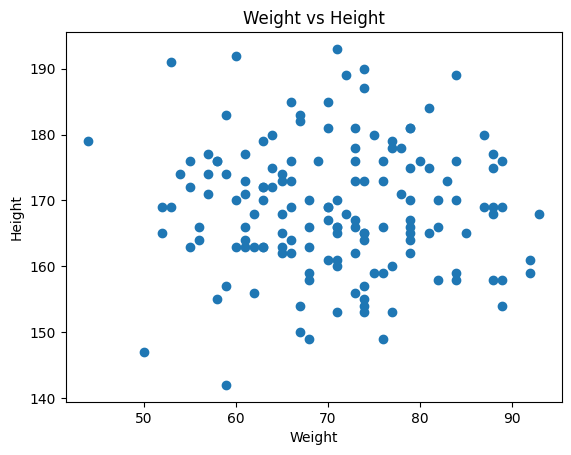

In [7]:
plt.scatter(df['weight'], df['height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height')
plt.show()

In [14]:
## divide our dataset into independent variables and dependent variables
X = df[['weight']].values
y = df['height'].values

In [15]:
## split the dataset into training and testing set
from sklearn.model_selection import train_test_split # type: ignore

## use of random state is to get the same split every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
X.shape

(150, 1)

In [17]:
X_train.shape, X_test.shape

((120, 1), (30, 1))

In [18]:
y_train.shape, y_test.shape

((120,), (30,))

In [19]:
# Standardization of data

from sklearn.preprocessing import StandardScaler # type: ignore
scaler = StandardScaler()

In [23]:
pd.DataFrame(X_train).head()


,0
0,78
1,73
2,65
3,84
4,52


In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

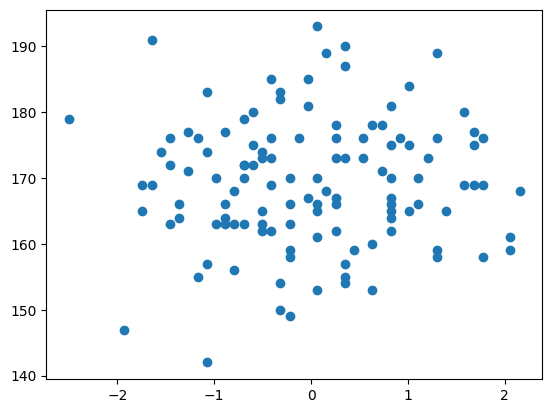

In [25]:
plt.scatter(X_train, y_train)

In [27]:
## Train the Simple linear regression model

from sklearn.linear_model import LinearRegression # type: ignore
regressor= LinearRegression()

In [28]:
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
print("The slope or coefficient of weight is ", regressor.coef_)
print("Intercept is ", regressor.intercept_)

The slope or coefficient of weight is  [0.35267502]
Intercept is  169.21666666666667


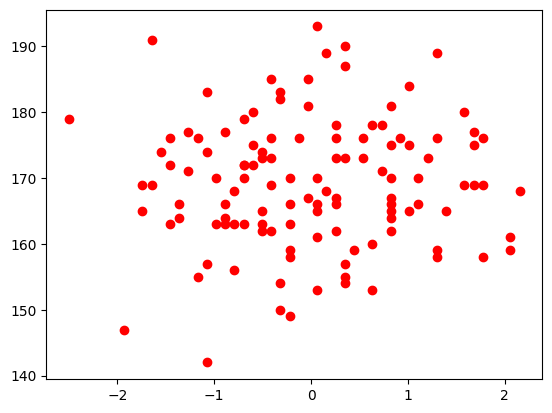

In [33]:
plt.scatter(X_train, y_train, color = 'red')

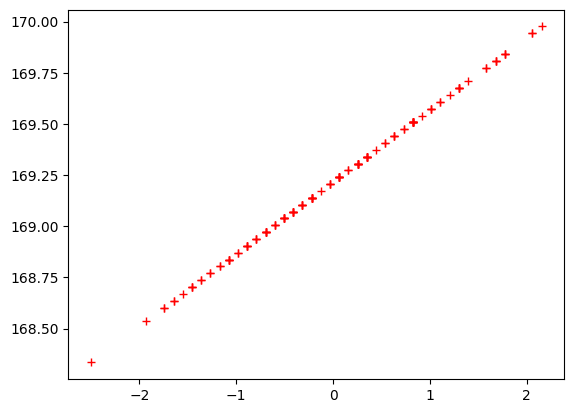

In [37]:
plt.plot(X_train, regressor.predict(X_train), 'r+')
plt.show()

In [40]:
y_pred_test = regressor.predict(X_test)

In [41]:
y_pred_test, y

(array([168.77029007, 169.30627698, 169.40677452, 169.07178271,
        168.9042868 , 169.30627698, 169.23927861, 169.33977616,
        168.87078762, 169.33977616, 169.8087647 , 169.4402737 ,
        169.60776961, 169.33977616, 168.9042868 , 169.20577943,
        168.80378926, 169.20577943, 169.33977616, 168.97128516,
        169.67476797, 169.8087647 , 169.20577943, 169.40677452,
        169.37327534, 169.50727207, 169.84226388, 169.40677452,
        169.03828353, 169.23927861]),
 array([169, 187, 162, 161, 169, 163, 181, 159, 158, 165, 165, 189, 179,
        170, 157, 178, 159, 154, 181, 173, 179, 173, 178, 163, 159, 176,
        161, 163, 165, 170, 166, 156, 163, 147, 176, 153, 158, 170, 162,
        185, 157, 172, 169, 158, 175, 168, 177, 178, 191, 183, 166, 167,
        180, 176, 176, 153, 169, 162, 172, 169, 179, 173, 177, 165, 160,
        165, 169, 173, 192, 169, 160, 166, 165, 174, 154, 170, 171, 172,
        164, 167, 155, 165, 164, 174, 158, 177, 184, 149, 174, 176, 163,
   

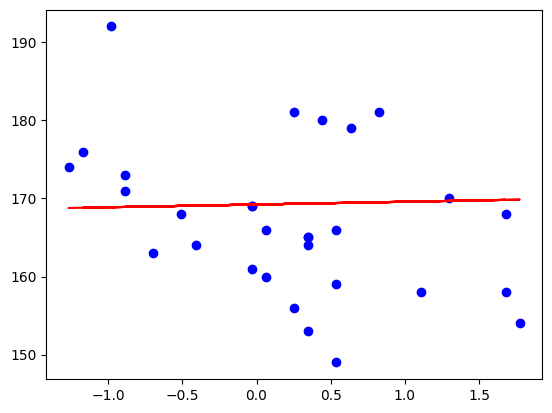

In [44]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, regressor.predict(X_test), 'r')

In [45]:
## Performance Metrics

## MSE, RMSE, MAE
## R square and adjusted R square

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # type: ignore

In [46]:
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred_test)

print("Mean Squared Error is ", mse)
print("Root Mean Squared Error is ", rmse)
print("Mean Absolute Error is ", mae)


Mean Squared Error is  96.97498395986437
Root Mean Squared Error is  9.84758772288241
Mean Absolute Error is  7.919173612507797


In [47]:
score = r2_score(y_test, y_pred_test)
print("R2 Score is ", score)

R2 Score is  -0.07915185671741831


In [48]:
regressor

LinearRegression()

In [52]:
scaled_weight = scaler.transform([[60]])
scaled_weight[0]

array([-0.98073022])

In [53]:
print("The height prediction for weight 60kg is", regressor.predict([scaled_weight[0]]))

The height prediction for weight 60kg is [168.87078762]


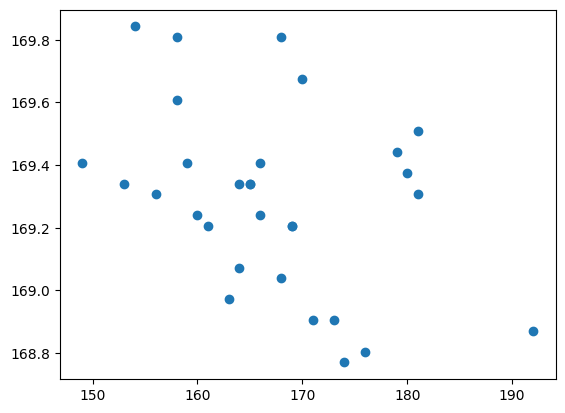

In [54]:
## Assumptions

## plot a scatter plot for the prediction

plt.scatter(y_test, y_pred_test)

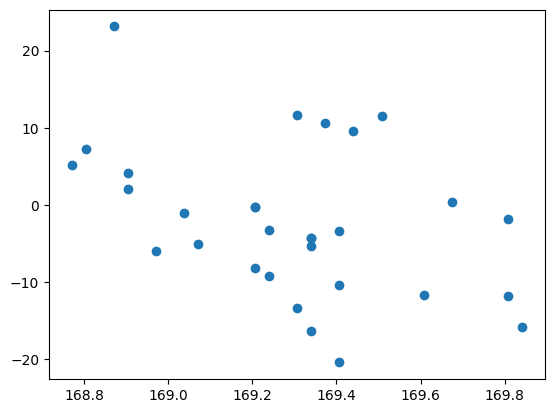

In [55]:
## Residuals
residuals = y_test - y_pred_test

## plot the reiduals

plt.scatter(y_pred_test, residuals)

C:\Users\KARAN\AppData\Local\Temp\ipykernel_8312\3301513583.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde = True)


<Axes: ylabel='Density'>

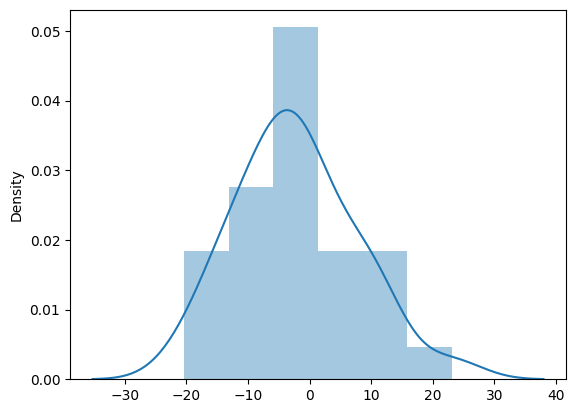

In [57]:
import seaborn as sns # type: ignore
sns.distplot(residuals, kde = True)